<a href="https://colab.research.google.com/github/Rahuldu98/Hotel_Booking_EDA-Capstone_Project/blob/main/Hotel_Booking_Analysis_by_Rahul_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [71]:
# First we import Python libraries.
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [72]:
#We have now linked our Googlecolab notebook to Google Drive.
from google.colab import drive
drive.mount('//content//drive')

Drive already mounted at //content//drive; to attempt to forcibly remount, call drive.mount("//content//drive", force_remount=True).


In [73]:
#Here we import the Hotel Booking.csv file from Google Drive and assign it the name df_hotel. 
df_hotel=pd.read_csv('//content//drive//MyDrive//Colab Notebooks//Capstone projects//Rahul capstone project 1//Hotel Bookings.csv')
df1=df_hotel.copy()

In [74]:
#Just take a look at the df_hotel file data.
df_hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [75]:
#get the basic info of each columns with not null rows and datatype
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            


# Now just take a look at the unique values of each column in the df_hotel file.


In [76]:
print(df_hotel['hotel'].unique())

['Resort Hotel' 'City Hotel']


* We observe that there are two type of hotel
* Resort Hotel 
* City hotel

In [77]:
print(df_hotel['is_canceled'].unique())

[0 1]


* here we notice :
* if guest cancel the hotel = 1  ;
* if not canceled = 0

In [78]:
print(df_hotel['lead_time'].unique())

[342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 330 134 350 334 283 153 197 133 241 193 235 194 261 260 216
 169 209 238 215 141 189 187 223 284 214 202 211 16

* The Booking **Lead Time** is the number of days between the time a guest books their room and the time they are scheduled to arrive at the hotel.

In [79]:
print(df_hotel['arrival_date_year'].unique())

[2015 2016 2017]


* **arrival_date_year** is Year of arrival of the Customer.

In [80]:
print(df_hotel['arrival_date_month'].unique())

['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']


* **arrival_date_month** is Months of arrival of the customer.

In [81]:
print(df_hotel['arrival_date_week_number'].unique())

[27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21
 22 23 24 25 26]


* **arrival_date_week_number** is weak of arrival of the customer.

In [82]:
print(df_hotel['arrival_date_day_of_month'].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


In [83]:
print(df_hotel['stays_in_weekend_nights'].unique())

[ 0  1  2  4  3  6 13  8  5  7 12  9 16 18 19 10 14]


In [84]:
print(df_hotel['stays_in_week_nights'].unique())

[ 0  1  2  3  4  5 10 11  8  6  7 15  9 12 33 20 14 16 21 13 30 19 24 40
 22 42 50 25 17 32 26 18 34 35 41]


In [85]:
print(df_hotel['adults'].unique())

[ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]


In [86]:
print(df_hotel['children'].unique())

[ 0.  1.  2. 10.  3. nan]


In [87]:
print(df_hotel['babies'].unique())

[ 0  1  2 10  9]


In [88]:
print(df_hotel['meal'].unique())

['BB' 'FB' 'HB' 'SC' 'Undefined']


In [89]:
print(df_hotel['country'].unique())

['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND' 'RWA'
 'KHM' 'MCO' 'BGD' 'IMN' 'TJK' 'NIC' 'BEN' 'VGB' 'TZA' 'GAB' 'GHA' 'TMP'
 'GLP' 'KEN' 'LIE' 'GNB' 'MNE' 'UMI' 'MYT' 'FRO' 'MMR' 'PAN' 'BFA' 'LBY'
 'MLI' 'NAM' 'BOL' 'PRY' 'BRB' 'ABW' 'AIA' 'SLV' 'DMA'

In [90]:
print(df_hotel['market_segment'].unique())

['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']


In [91]:
print(df_hotel['distribution_channel'].unique())

['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']


In [92]:
print(df_hotel['is_repeated_guest'].unique())

[0 1]


In [93]:
print(df_hotel['previous_cancellations'].unique())

[ 0  1  2  3 26 25 14  4 24 19  5 21  6 13 11]


In [94]:
print(df_hotel['previous_bookings_not_canceled'].unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21 22 23 24
 25 27 28 29 30 19 26 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72]


In [95]:
print(df_hotel['reserved_room_type'].unique())

['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']


In [96]:
print(df_hotel['assigned_room_type'].unique())

['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P' 'L' 'K']


In [97]:
print(df_hotel['booking_changes'].unique())

[ 3  4  0  1  2  5 17  6  8  7 10 16  9 13 12 20 14 15 11 21 18]


In [98]:
print(df_hotel['deposit_type'].unique())

['No Deposit' 'Refundable' 'Non Refund']


In [99]:
print(df_hotel['agent'].unique())

[ nan 304. 240. 303.  15. 241.   8. 250. 115.   5. 175. 134. 156. 243.
 242.   3. 105.  40. 147. 306. 184.  96.   2. 127.  95. 146.   9. 177.
   6. 143. 244. 149. 167. 300. 171. 305.  67. 196. 152. 142. 261. 104.
  36.  26.  29. 258. 110.  71. 181.  88. 251. 275.  69. 248. 208. 256.
 314. 126. 281. 273. 253. 185. 330. 334. 328. 326. 321. 324. 313.  38.
 155.  68. 335. 308. 332.  94. 348. 310. 339. 375.  66. 327. 387. 298.
  91. 245. 385. 257. 393. 168. 405. 249. 315.  75. 128. 307.  11. 436.
   1. 201. 183. 223. 368. 336. 291. 464. 411. 481.  10. 154. 468. 410.
 390. 440. 495. 492. 493. 434.  57. 531. 420. 483. 526. 472. 429.  16.
 446.  34.  78. 139. 252. 270.  47. 114. 301. 193. 182. 135. 350. 195.
 352. 355. 159. 363. 384. 360. 331. 367.  64. 406. 163. 414. 333. 427.
 431. 430. 426. 438. 433. 418. 441. 282. 432.  72. 450. 180. 454. 455.
  59. 451. 254. 358. 469. 165. 467. 510. 337. 476. 502. 527. 479. 508.
 535. 302. 497. 187.  13.   7.  27.  14.  22.  17.  28.  42.  20.  19.
  45. 

In [100]:
print(df_hotel['company'].unique())

[ nan 110. 113. 270. 178. 240. 154. 144. 307. 268.  59. 204. 312. 318.
  94. 174. 274. 195. 223. 317. 281. 118.  53. 286.  12.  47. 324. 342.
 373. 371. 383.  86.  82. 218.  88.  31. 397. 392. 405. 331. 367.  20.
  83. 416.  51. 395. 102.  34.  84. 360. 394. 457. 382. 461. 478. 386.
 112. 486. 421.   9. 308. 135. 224. 504. 269. 356. 498. 390. 513. 203.
 263. 477. 521. 169. 515. 445. 337. 251. 428. 292. 388. 130. 250. 355.
 254. 543. 531. 528.  62. 120.  42.  81. 116. 530. 103.  39.  16.  92.
  61. 501. 165. 291. 290.  43. 325. 192. 108. 200. 465. 287. 297. 490.
 482. 207. 282. 437. 225. 329. 272.  28.  77. 338.  72. 246. 319. 146.
 159. 380. 323. 511. 407. 278.  80. 403. 399.  14. 137. 343. 346. 347.
 349. 289. 351. 353.  54.  99. 358. 361. 362. 366. 372. 365. 277. 109.
 377. 379.  22. 378. 330. 364. 401. 232. 255. 384. 167. 212. 514. 391.
 400. 376. 402. 396. 302. 398.   6. 370. 369. 409. 168. 104. 408. 413.
 148.  10. 333. 419. 415. 424. 425. 423. 422. 435. 439. 442. 448. 443.
 454. 

In [101]:
print(df_hotel['days_in_waiting_list'].unique())

[  0  50  47  65 122  75 101 150 125  14  60  34 100  22 121  61  39   5
   1   8 107  43  52   2  11 142 116  13  44  97  83   4 113  18  20 185
  93 109   6  37 105 154  64  99  38  48  33  77  21  80  59  40  58  89
  53  49  69  87  91  57 111  79  98  85  63  15   3  41 224  31  56 187
 176  71  55  96 236 259 207 215 160 120  30  32  27  62  24 108 147 379
  70  35 178 330 223 174 162 391  68 193  10  76  16  28   9 165  17  25
  46   7  84 175 183  23 117  12  54  26  73  45  19  42  72  81  92  74
 167  36]


In [102]:
print(df_hotel['customer_type'].unique())

['Transient' 'Contract' 'Transient-Party' 'Group']


In [103]:
print(df_hotel['adr'].unique())

[  0.    75.    98.   ... 266.75 209.25 157.71]


In [104]:
print(df_hotel['required_car_parking_spaces'].unique())

[0 1 2 8 3]


In [105]:
print(df_hotel['total_of_special_requests'].unique())

[0 1 3 2 4 5]


In [106]:
print(df_hotel['reservation_status'].unique())

['Check-Out' 'Canceled' 'No-Show']


# Looking for and handling Nan , Null and Missing Values.

In [107]:
#First we remove duplicacy rows.
#df_hotel[df_hotel.duplicated()]

In [108]:
#Now remove duplicate rows.
#df_hotel = df_hotel[df_hotel.duplicated()]

In [109]:
# Here we find null values in each column and sum them.
null_value = df_hotel.isnull().sum()
print(null_value)

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [110]:
#Now we calculate percentage values of null vallues of each columns.
null_value_percentage =(df_hotel.isnull().sum()/len(df_hotel))*100  #sum
print(null_value_percentage)

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [111]:
#We now combine the null_value and null_value_percentage series in the dataframe using concat method.
concatenate_null =pd.concat([null_value,null_value_percentage],axis=1,keys=['null_value','null_value_percentage'])
print(concatenate_null)

                                null_value  null_value_percentage
hotel                                    0               0.000000
is_canceled                              0               0.000000
lead_time                                0               0.000000
arrival_date_year                        0               0.000000
arrival_date_month                       0               0.000000
arrival_date_week_number                 0               0.000000
arrival_date_day_of_month                0               0.000000
stays_in_weekend_nights                  0               0.000000
stays_in_week_nights                     0               0.000000
adults                                   0               0.000000
children                                 4               0.003350
babies                                   0               0.000000
meal                                     0               0.000000
country                                488               0.408744
market_seg

* Here we observe that out of **32** columns, **4** columns have null values. These are the **children, country,agent, and company**. Since **company columns have a 94.30% maximum null value**, We drop company columns in the next step, and other null-value columns will be filled by the other values.

In [112]:
#droping Company Columns
df_hotel=df_hotel.drop('company',axis=1)
df_hotel.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


* Now there are **31 Columns** left , after dropping the company column.
* In the Next Line **we filling null values of children,country and agent**.

In [113]:
#Check how many null values are there in children column.
df_hotel['children'].notnull().value_counts()

True     119386
False         4
Name: children, dtype: int64

In [114]:
#there are 4 missing values of children i fill them by 0
df_hotel['children'] = df_hotel['children'].fillna(0,axis=0)


In [115]:
#Recheck 
df_hotel['children'].notnull().value_counts()

True    119390
Name: children, dtype: int64

In [116]:
#Check how many null values are there in country column.
df_hotel['country'].notnull().value_counts()

True     118902
False       488
Name: country, dtype: int64

In [117]:
#there are 488 missing values of children i fill them by 'Other'
df_hotel['country'] = df_hotel['country'].fillna('other',axis=0)

In [118]:
#Recheck
df_hotel['country'].notnull().value_counts()

True    119390
Name: country, dtype: int64

In [119]:
#Check how many null values are there in agent column.
df_hotel['agent'].notnull().value_counts()

True     103050
False     16340
Name: agent, dtype: int64

In [120]:
#there are 16340 missing values of children in fill them by 
#df_hotel['agent'] = df_hotel['agent'].fillna('',axis=0)

In [121]:
#Recheck
#df_hotel['agent'].notnull().value_counts()

# **Eda on Problems** 

# hotel type analysis
* Q1.type of hotel
* Q2.most high booking  or %
* q3. which hotel most cancel ---------bi
* q4 average of adr city and resort hotel--------bi or multi

In [190]:
#Answer 1
print(df_hotel['hotel'].unique())

['Resort Hotel' 'City Hotel']


In [123]:
#Answer 2
df_hotel['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

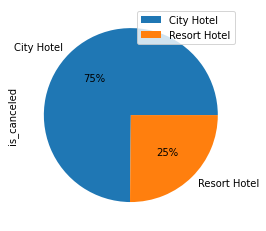

In [205]:
#  
hotelbooking=df_hotel.groupby(['hotel']).sum().plot(kind='pie', y='is_canceled',autopct='%1.0f%%')
hotelbooking



,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
hotel,,,,,,,,,,,,,,,,,,,
City Hotel,33102,8705335,159943106,2155987,1252353,63082,173174,146838,7248.0,392,2032,6326,10501,14864,2003876.0,255980,8353803.24,1933,43387
Resort Hotel,11122,3712588,80765825,1087263,633799,47664,125337,74798,5155.0,557,1778,4075,5867,11536,6929877.0,21142,3803814.36,5531,24828


In [161]:
# adrcount = df_hotel.groupby('hotel').count()
# adrcount

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
hotel,,,,,,,,,,,,,,,,,,,,,
City Hotel,79330,79330,79330,79330,79330,79330,79330,79330,79330,79330,...,79330,79330,71199,79330,79330,79330,79330,79330,79330,79330
Resort Hotel,40060,40060,40060,40060,40060,40060,40060,40060,40060,40060,...,40060,40060,31851,40060,40060,40060,40060,40060,40060,40060


# Find peak season
* Q1.number of booking months wise
* Q2.graph of cooresponding to year

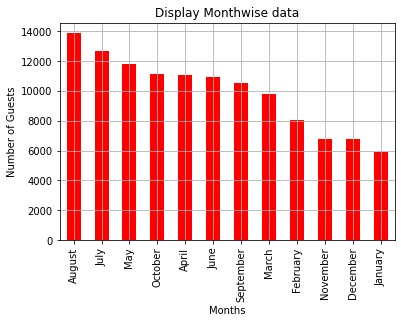

In [202]:
#answer 1
month_wise_data= df_hotel['arrival_date_month'].value_counts()
month_wise_data.plot(kind = "bar",color='r')
plt.grid(True)
plt.title('Display Monthwise data')
plt.xlabel('Months')
plt.ylabel('Number of Guests');

# Hotel adr(Average Daily Rate)=Room revenue /room sold
* Q1. adr min room sold maximum and vicevarsa
* Q2. adr relation cancellation
* Q3. relation profiit
* **Q4.hotel higher booking cancellation rate**  another question

In [126]:
# x=df1[df1['company'].notnull()]
# print(x['company'].astype(int).value_counts())

# Problems---->type of room
* Q1.How many types of rooms are provided through Hotels?  -------------    uni
* Q2.most preffered room by the guest        -------  uni
* Q3.hotel default assigning the room    --------  bi 


In [127]:
#Answer 1
provided_room_by_hotel = df_hotel['reserved_room_type'].unique()
print(provided_room_by_hotel)


['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']


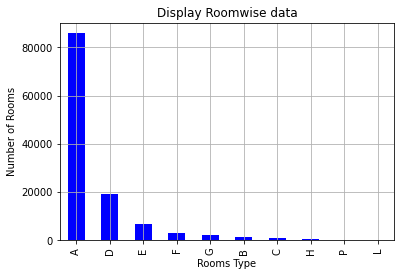

In [204]:
#answer 2
most_prefer_room = df_hotel['reserved_room_type'].value_counts()
most_prefer_room.plot(kind = "bar",color='b')
plt.grid(True)
plt.title('Display Roomwise data')
plt.xlabel('Rooms Type')
plt.ylabel('Number of Rooms');


In [129]:
#Answer 3


# lead time analysis
* Q1.maximum and minimum lead time---uni
* Q2  how many people have lead time 0 and how many have lead time not zero(greater than 10 hours and less than 10 )
* Q3. lead time affect booking cancellation------------bi

In [130]:
 #Answer 1
print(df_hotel['lead_time'].max())
print(df_hotel['lead_time'].min())

737
0


In [131]:
#Answer 2
#x=df_hotel.groupby('lead_time').count()
df_hotel.groupby('lead_time').sum()            ## answer 3 observe

,is_canceled,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
lead_time,,,,,,,,,,,,,,,,,,
0,430,12791837,160337,99612,2476,7416,10304,451.0,47,1148,247,3433,1612,337453.0,0,528245.54,824,2219
1,321,6975678,83809,53367,1402,4963,5614,323.0,47,389,214,1840,720,279038.0,1,311088.17,526,2105
2,213,4171367,51198,32804,1042,3158,3423,198.0,18,222,114,1168,431,171844.0,0,194463.81,302,1322
3,182,3661200,45594,28176,1353,2935,2961,184.0,22,185,96,1242,369,146866.0,0,168583.46,258,1178
4,176,3457654,41721,27175,1176,2834,2791,200.0,17,186,132,1276,342,125352.0,2,162658.71,198,1139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,17,34289,204,391,0,32,32,0.0,0,0,0,0,0,17.0,0,1048.00,0,0
626,30,60480,1380,210,30,60,60,0.0,0,0,0,0,0,30.0,0,1884.00,0,0
629,17,34289,221,510,0,32,32,0.0,0,0,0,0,0,17.0,0,1048.00,0,0


In [132]:
#Answer 2
df_hotel['lead_time'].dtype

dtype('int64')

In [133]:
df_hotel['lead_time'].unique()

array([342, 737,   7,  13,  14,   0,   9,  85,  75,  23,  35,  68,  18,
        37,  12,  72, 127,  78,  48,  60,  77,  99, 118,  95,  96,  69,
        45,  40,  15,  36,  43,  70,  16, 107,  47, 113,  90,  50,  93,
        76,   3,   1,  10,   5,  17,  51,  71,  63,  62, 101,   2,  81,
       368, 364, 324,  79,  21, 109, 102,   4,  98,  92,  26,  73, 115,
        86,  52,  29,  30,  33,  32,   8, 100,  44,  80,  97,  64,  39,
        34,  27,  82,  94, 110, 111,  84,  66, 104,  28, 258, 112,  65,
        67,  55,  88,  54, 292,  83, 105, 280, 394,  24, 103, 366, 249,
        22,  91,  11, 108, 106,  31,  87,  41, 304, 117,  59,  53,  58,
       116,  42, 321,  38,  56,  49, 317,   6,  57,  19,  25, 315, 123,
        46,  89,  61, 312, 299, 130,  74, 298, 119,  20, 286, 136, 129,
       124, 327, 131, 460, 140, 114, 139, 122, 137, 126, 120, 128, 135,
       150, 143, 151, 132, 125, 157, 147, 138, 156, 164, 346, 159, 160,
       161, 333, 381, 149, 154, 297, 163, 314, 155, 323, 340, 35

In [134]:
df_hotel['is_canceled'].dtype

dtype('int64')

In [135]:
df_hotel['is_canceled'].unique()

array([0, 1])

In [136]:
df_hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

#Hotel Meal Consumption Analysis
* Q1.type of meal offer by hotel?
* Q2.most  prefer meal consumption
* Q3. extra demand on meal 

In [137]:
#answer1
df_hotel['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [138]:
#answer 2
df_hotel['meal'].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64